# 인접 공원 클러스터링
- 위도, 경도 기반


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,413 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155225 files and d

In [7]:
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
  fm.fontManager.addfont(font_file)

#plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [13]:
# k-means 클러스터링
from sklearn.cluster import KMeans

In [32]:
park = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elice_team_project1/관악구 산스장 데이터.csv')
park

,번호,명칭,위치,동이름,위도,Unnamed: 5,Unnamed: 6,경도,설치기구종류,운동기구 총계,담당부서,데이터기준일
0,1,도림천,신림동 808-126 ~ 구로교(구로디지털단지역) (관악구 6.7km 관리),대학동,"374,592,205,600,000",37.459221,0.459221,"1,269,474,365,000,000","워킹머신 (4개),롤링웨이스트 (3개),허리돌리기 (2개),크로스컨트리 (5개),트...",45,치수과,#######
1,2,관악산 야외식물원,신림동 205-1,대학동,"374,611,753,200,000",37.461175,0.461175,"1,269,482,240,000,000","등허리운동,뱃살운동,다리운동,허리운동,노젓기운동,괄약근운동,양다리운동,옆회전운동,평행봉",9,공원녹지과,#######
2,3,관악산 샘말공원,서울특별시 관악구 신림동 신림로,신림동,"374,649,003,200,000",37.464900,0.464900,"1,269,384,872,000,000","양다리운동,옆회전운동,원그리기운동,허리운동,노젓기운동,마라톤운동,팔올리기운동,하체단...",11,공원녹지과,#######
3,4,맨발공원,신림동 산 27-5,대학동,"374,665,302,234,076",37.466530,0.466530,"1,269,443,508,155,040","원그리기운동,팔내리기운동,옆회전운동,허리돌리기,역기,윗몸일으키기,평행봉, 철봉,달리...",14,공원녹지과,#######
4,5,제2구민운동장,신림동 58-8,신림동,"374,581,915,973,847",37.458192,0.458192,"1,269,336,537,740,990","원그리기운동,허리운동,옆회전운동,양다리운동,팔올리기운동,노젓기운동,뱃살운동",7,공원녹지과,#######
...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,까치 어린이공원,서울특별시 관악구 봉천동 행운4길 까치어린이공원,봉천동,"374,799,432,500,000",37.479943,0.479943,"1,269,595,981,000,000","흔들이,터닝암,하늘걷기,온몸역기올리기,허리돌리기,상체원그리기",9,공원녹지과,#######
75,76,장미 어린이공원,서울특별시 관악구 봉천동 148-103,봉천동,"374,790,712,880,006",37.479071,0.479071,"1,269,623,674,142,560","스탭싸이클,암벽타기,허리돌리기",4,공원녹지과,#######
76,77,모래내 어린이공원,서울특별시 관악구 봉천동 남부순환로230길 모래내어린이공원,봉천동,"374,778,008,500,570",37.477801,0.477801,"1,269,555,808,301,340","흔들이,윗몸일으키기,하늘걷기,평행봉,온몸역기올리기",7,공원녹지과,#######
77,78,백설 어린이공원,서울특별시 관악구 봉천동 1606-11,봉천동,"374,760,049,909,088",37.476005,0.476005,"1,269,536,698,361,820","다리들기,허리돌리기,터닝암",5,공원녹지과,#######


In [48]:
park_position = park[['명칭','위도','경도']].set_index('명칭')
park_position['위도'] = park_position['위도'].apply(lambda x: int(x[3:].replace(',','')))
park_position['경도'] = park_position['경도'].apply(lambda x: int(x[5:].replace(',','')))
park_position

Index(['도림천', '관악산 야외식물원', '관악산 샘말공원', '맨발공원', '제2구민운동장', '신림2-1배수지',
       '봉천11배수지공원(놀이터부근)', '봉천11배수지공원(배드민턴장부근)', '신림6배수지공원', '선우공원', '고시공원',
       '난우공원', '미성체육관 부근', '난향동 서울숲요양원 뒤', '난향동 주민쉼터', '난향공원',
       '청룡산공원(배드민턴장 옆)', '청룡산공원(유아숲체험장윈)', '청룡산입구(청룡초 뒤)', '청룡산공원(관악경찰서 옆)',
       '청룡산공원(텃밭공원)', '낙성대공원(구민체육센터 일대)', '근린8지구', '근린19지구', '신림 근린공원',
       '까치산 근린공원', '장군봉 근린공원', '상도 근린공원', '약수 어린이공원', '대협 어린이공원', '난우 어린이공원',
       '난곡 어린이공원', '한라 어린이공원', '신라 어린이공원', '합실 어린이공원', '약수암 어린이공원',
       '사우촌 어린이공원', '목화 어린이공원', '태양 어린이공원', '새숲 어린이공원', '미도 어린이공원', '색동 어린이공원',
       '새들 어린이공원', '남부 어린이공원', '일선 어린이공원', '봉림 어린이공원', '호박골 어린이공원',
       '무궁화 어린이공원', '보명 어린이공원', '쑥고개 어린이공원', '신화 어린이공원', '해태 어린이공원',
       '서광 어린이공원', '서원 어린이공원', '상록 어린이공원', '예촌 어린이공원', '군아파트 어린이공원',
       '교체 어린이공원', '밤골 어린이공원', '인헌 어린이공원', '원당 어린이공원', '새싹 어린이공원', '미성동 소공원',
       '선봉 어린이공원', '은천 어린이공원', '국회단지 어린이공원', '국지 어린이공원', '국사봉 어린이공원',
       '학다리 어린이공원', '청룡 어린이공원', '비안 어린이공원', '용담 어린이공원', '영락 어

,위도,경도
명칭,,
도림천,592205600000,474365000000
관악산 야외식물원,611753200000,482240000000
관악산 샘말공원,649003200000,384872000000
맨발공원,665302234076,443508155040
제2구민운동장,581915973847,336537740990
...,...,...
까치 어린이공원,799432500000,595981000000
장미 어린이공원,790712880006,623674142560
모래내 어린이공원,778008500570,555808301340


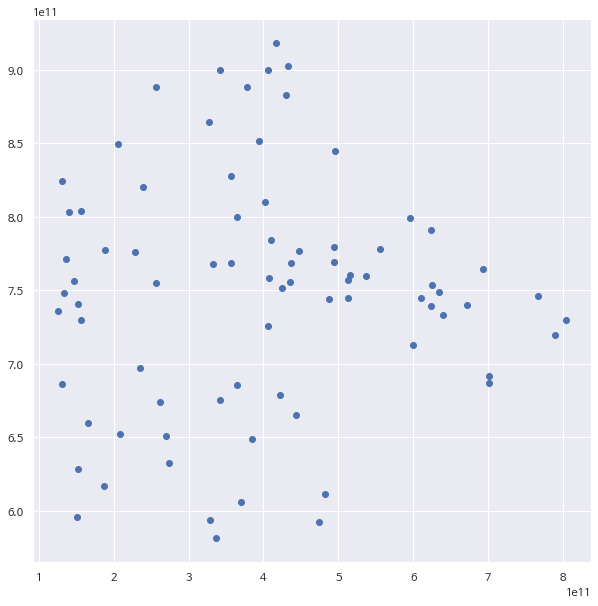

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(data=park_position, x='경도',y='위도')
# for ind in park_position.index:
#   ax.annotate(ind, (park_position.loc[ind]['경도'], park_position.loc[ind]['위도']))
plt.show()

In [212]:
# clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15,random_state=4).fit(park_position[['경도','위도']])
labels=kmeans.labels_
centers=kmeans.cluster_centers_

In [213]:
park_position['clustering'] = labels
park_position.head(10)

,위도,경도,clustering
명칭,,,
도림천,592205600000,474365000000,10
관악산 야외식물원,611753200000,482240000000,10
관악산 샘말공원,649003200000,384872000000,5
맨발공원,665302234076,443508155040,10
제2구민운동장,581915973847,336537740990,5
신림2-1배수지,632424000000,274051000000,11
봉천11배수지공원(놀이터부근),691872300000,701342000000,6
봉천11배수지공원(배드민턴장부근),686988700000,700973000000,6
신림6배수지공원,674018100000,261447000000,11


In [214]:
park_clustering = park_position.groupby('clustering').count()
park_clustering['count'] = park_clustering['위도']
park_clustering.drop(columns=['위도','경도'], inplace=True)
park_clustering

,count
clustering,
0,5
1,8
2,7
3,3
4,7
5,6
6,4
7,3
8,5


In [215]:
colors = sns.color_palette('tab20')

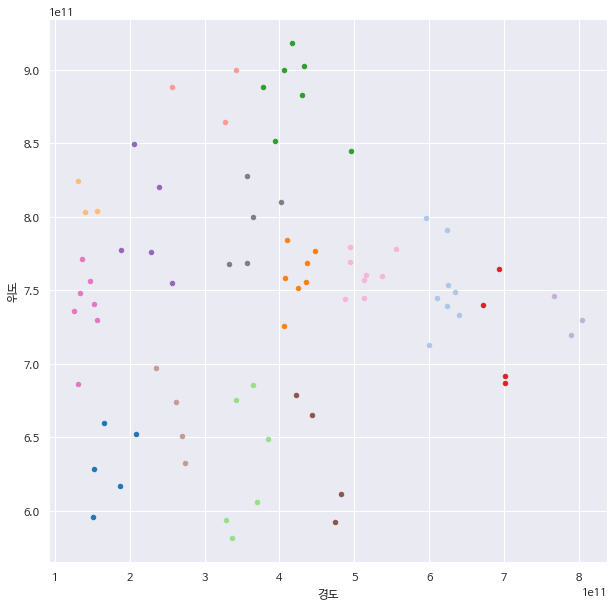

In [216]:
fig, ax = plt.subplots(figsize=(10,10))
for cluster in range(20):
  park_temp=park_position[park_position['clustering']==cluster]
  park_temp.plot.scatter(x='경도',y='위도',ax=ax,color=colors[cluster])


In [219]:
park_final = park_position[['clustering']].sort_values('clustering')
park_final.head(10)

,clustering
명칭,
미도 어린이공원,0
난향공원,0
난향동 주민쉼터,0
난향동 서울숲요양원 뒤,0
근린19지구,0
탑골 어린이공원,1
약수 어린이공원,1
교체 어린이공원,1
낙성대공원(구민체육센터 일대),1
